pyenv local 3.11.2

In [1]:
# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load dataset
data = pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#describe statistics of int/float columns
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='age', ylabel='Count'>

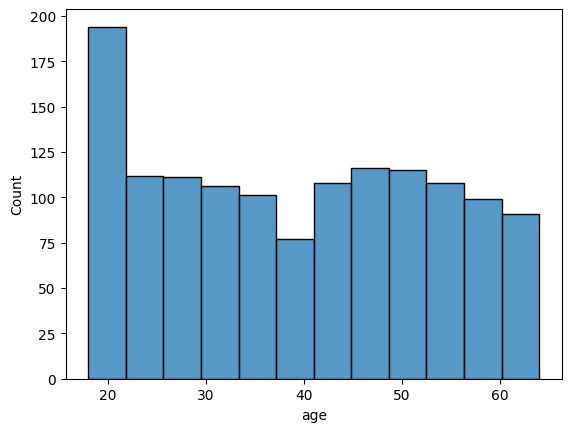

In [6]:
#Distribution of age
sns.histplot(data.age)

<Axes: xlabel='charges', ylabel='Count'>

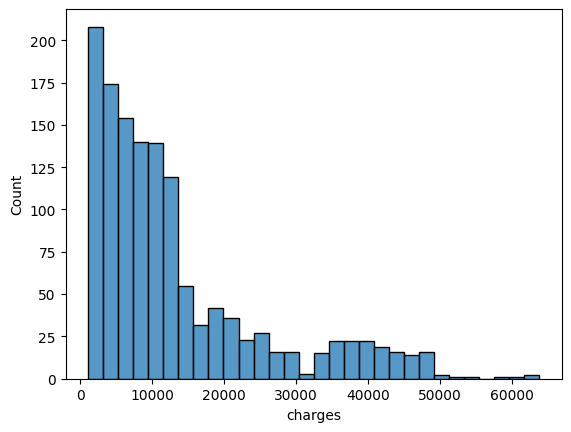

In [33]:
sns.histplot(data.charges)

Text(0.5, 0, 'No. of children')

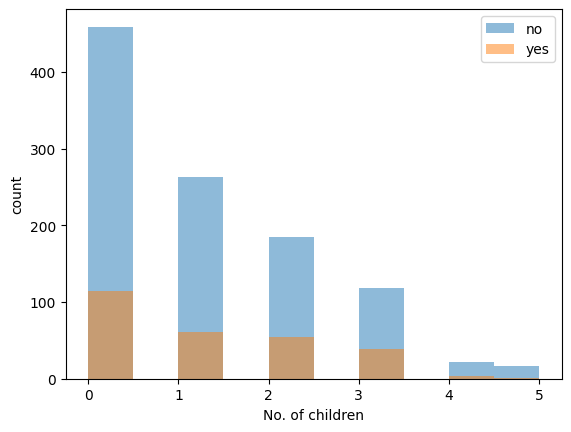

In [7]:
data.groupby('smoker')['children'].plot(kind='hist', alpha=0.5, legend= True)
plt.ylabel('count')
plt.xlabel('No. of children')

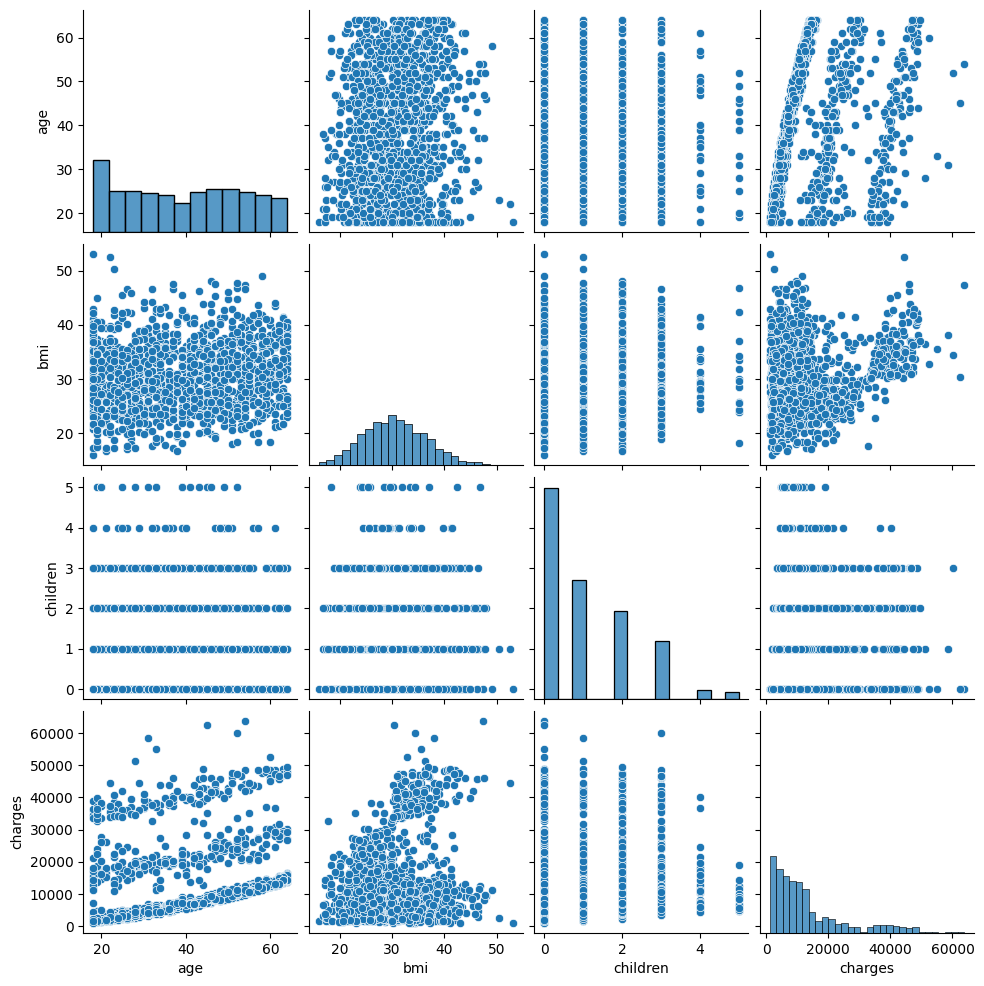

In [8]:
#Visualize correlations
sns.pairplot(data)

<Axes: ylabel='count'>

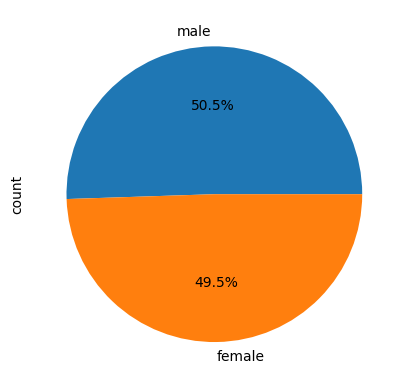

In [9]:
# Distribution of sex
data.sex.value_counts().plot(kind='pie', autopct='%1.1f%%')

Hypothesis: Charges are dependent not only on factor age

-> BMI and sex does not show correlation <br>
-> regions shows no correlation <br>
-> correlation between smoker y/n found! Non-smoker pay lowest charges <br>

<Axes: xlabel='age', ylabel='charges'>

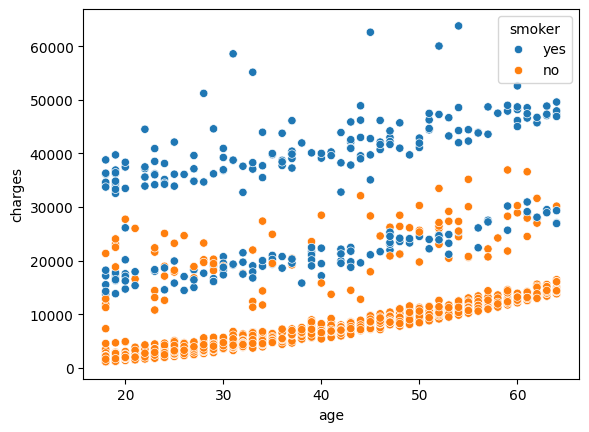

In [10]:
sns.scatterplot(data = data, x = 'age', y = 'charges', hue = 'smoker')

Compare charges of smoker and non-smoker in a boxplot

<Axes: xlabel='smoker', ylabel='charges'>

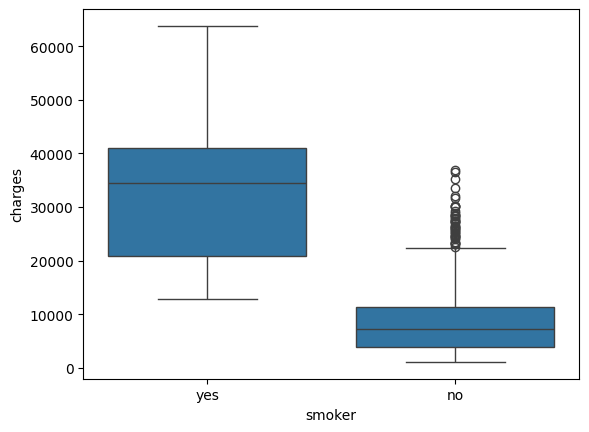

In [11]:
sns.boxplot(data=data, x= 'smoker', y='charges')

Why do some people pay more charges even they are no smokers? -> Investigate outliers

In [12]:
data.groupby('smoker')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


In [13]:
# Create new dataset of outliers
outlier = 11362.887 + 1.5 * (11362.887050-3986.438700)
data2 = data[(data['charges'] >= outlier) & (data['smoker'] == 'no')]
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 9 to 1258
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       46 non-null     int64  
 1   sex       46 non-null     object 
 2   bmi       46 non-null     float64
 3   children  46 non-null     int64  
 4   smoker    46 non-null     object 
 5   region    46 non-null     object 
 6   charges   46 non-null     float64
dtypes: float64(2), int64(2), object(3)
memory usage: 2.9+ KB


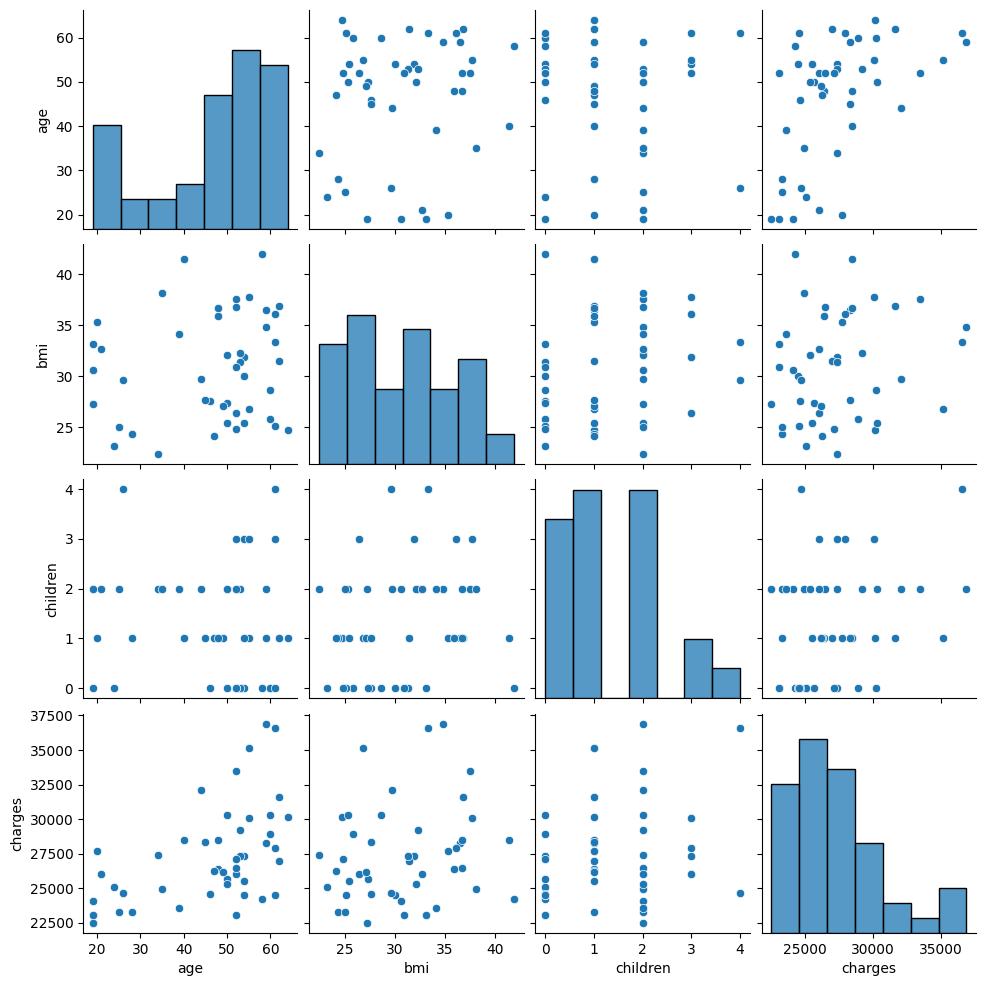

In [14]:
#Visualize new dataset in a pairplot
data2=data2.drop(['smoker'], axis =1) # drop smoker column since it is redundant
sns.pairplot(data2)

Are charges dependent on number of children or region?

No correlation can be seen

<Axes: xlabel='age', ylabel='charges'>

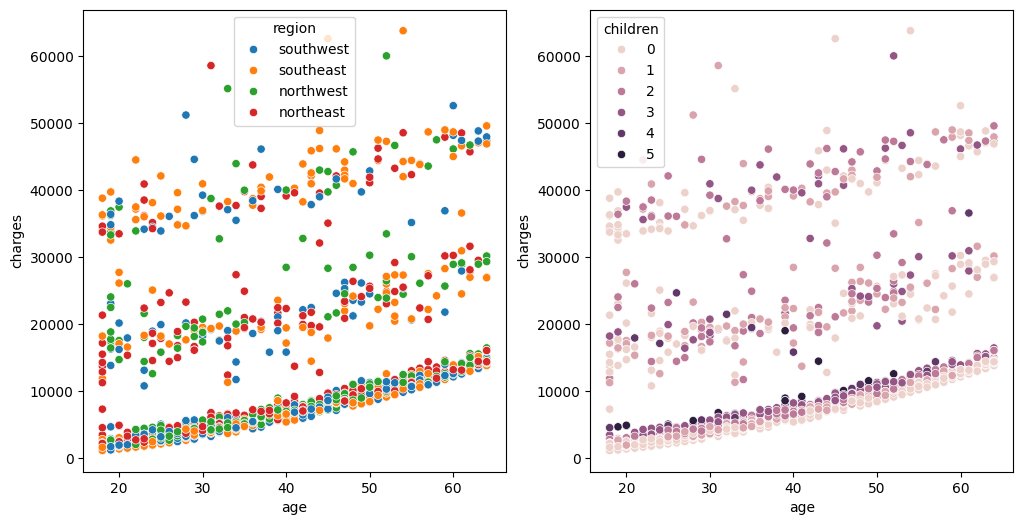

In [15]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.scatterplot(data = data, x = 'age', y = 'charges', hue = 'region')

plt.subplot(122)
sns.scatterplot(data = data, x = 'age', y = 'charges', hue = 'children')

<Axes: xlabel='charges', ylabel='Count'>

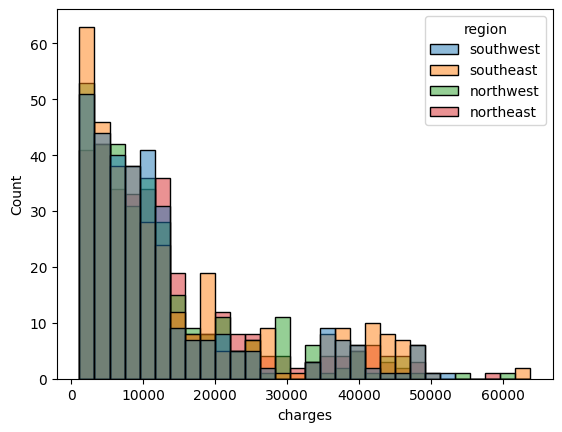

In [16]:
sns.histplot(data = data, x='charges', hue='region')

Does the BMI affect the charges for smoker and non-smoker?

<Axes: xlabel='bmi', ylabel='charges'>

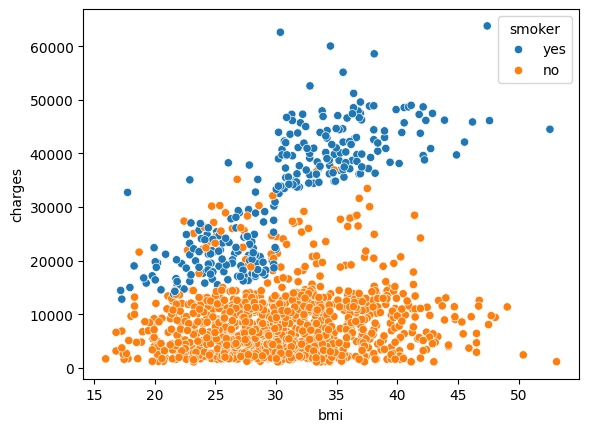

In [17]:
sns.scatterplot(data= data, x= 'bmi', y = 'charges', hue = 'smoker')

In [18]:
# create new dataframe for smokers
d_smoker = data[data['smoker'] == 'yes']

In [19]:
d_smoker = d_smoker.drop('smoker', axis=1) # drop smoker column since it is redundant

In [20]:
d_smoker.head()

,age,sex,bmi,children,region,charges
0,19,female,27.90,0,southwest,16884.9240
11,62,female,26.29,0,southeast,27808.7251
14,27,male,42.13,0,southeast,39611.7577
19,30,male,35.30,0,southwest,36837.4670
23,34,female,31.92,1,northeast,37701.8768


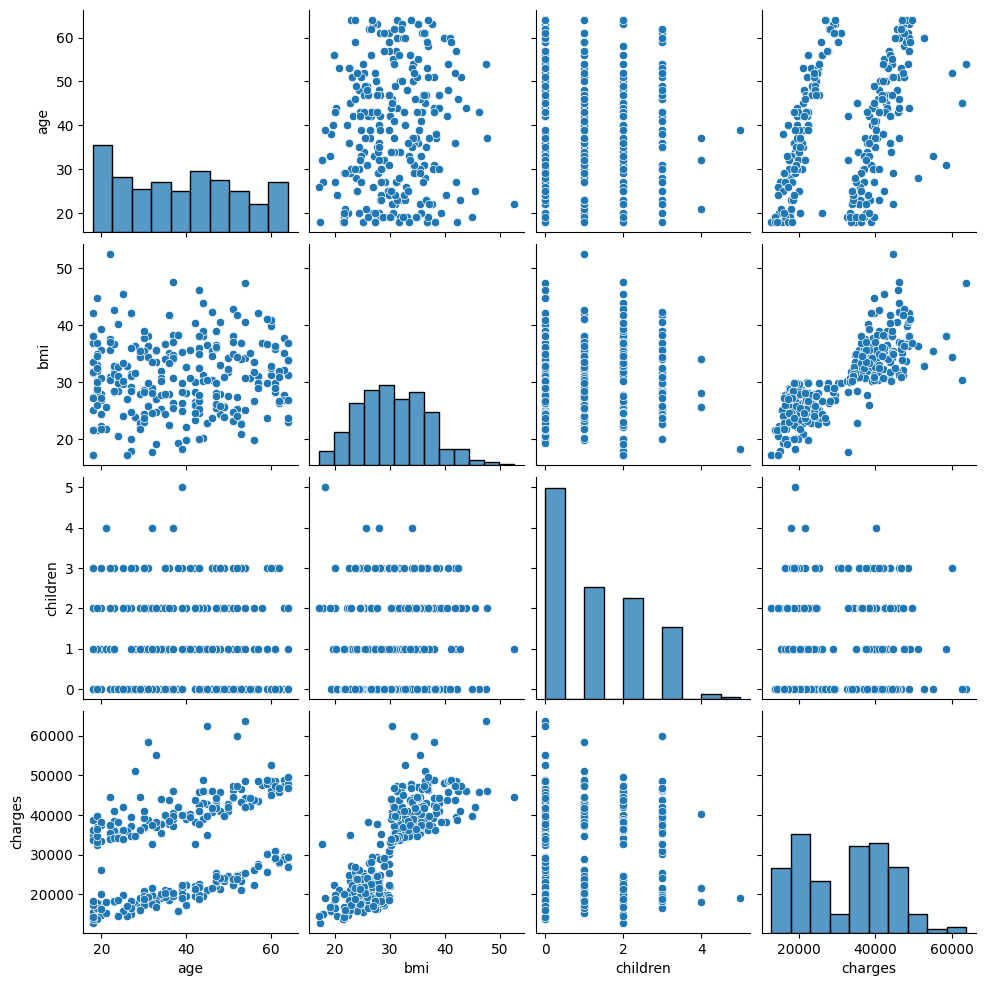

In [21]:
sns.pairplot(d_smoker)

When plotting charges against age, two groups are visible. Does BMI affect the charges?<br>
At BMI 30 there seems to be a cut between two groups

<Axes: xlabel='bmi', ylabel='Count'>

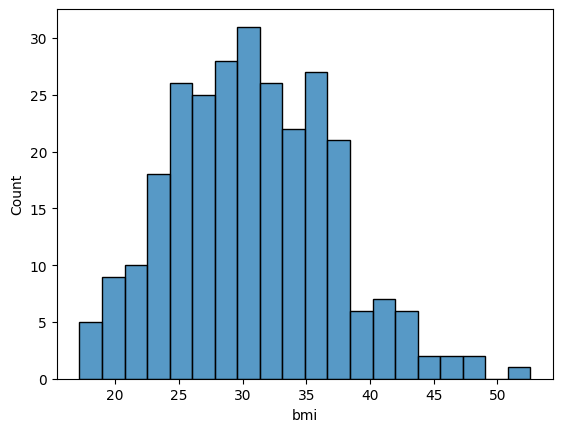

In [22]:
sns.histplot(d_smoker['bmi'], bins = 20)

In [23]:
# create a new column with BMI >30 is true
d_smoker['high_bmi'] = d_smoker['bmi']>30

Now, the effect of BMI on the charges for smokers can be visualized

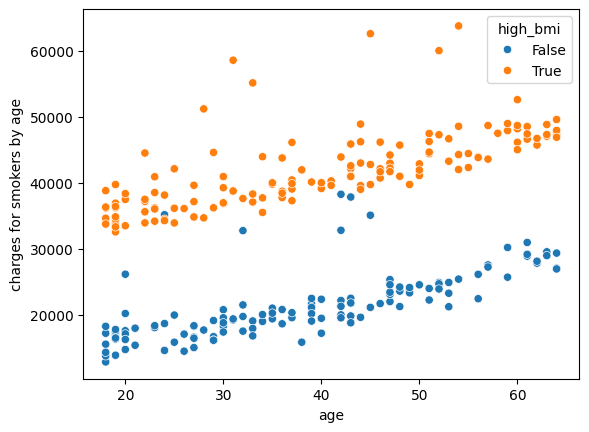

In [24]:
#plt.figure()
figure = sns.scatterplot(data=d_smoker, x= 'age', y= 'charges', hue = 'high_bmi')
figure.set_ylabel('charges for smokers by age')
plt.show()

In [25]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Additional investigations
## restructure dataset and replace objects with int
Replace smoker and sex with int values 0 and 1:<br>
female = 0, male = 1, yes = 1, no = 0

In [26]:
dataf = pd.get_dummies(data, columns= ['region'],dtype=int)
dataf = dataf.replace(to_replace=['female','male','yes','no'], value=[0,1,1,0])
dataf

/var/folders/k4/15639thj2wv04zjsd9344mlm0000gn/T/ipykernel_42880/334838339.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataf = dataf.replace(to_replace=['female','male','yes','no'], value=[0,1,1,0])


,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


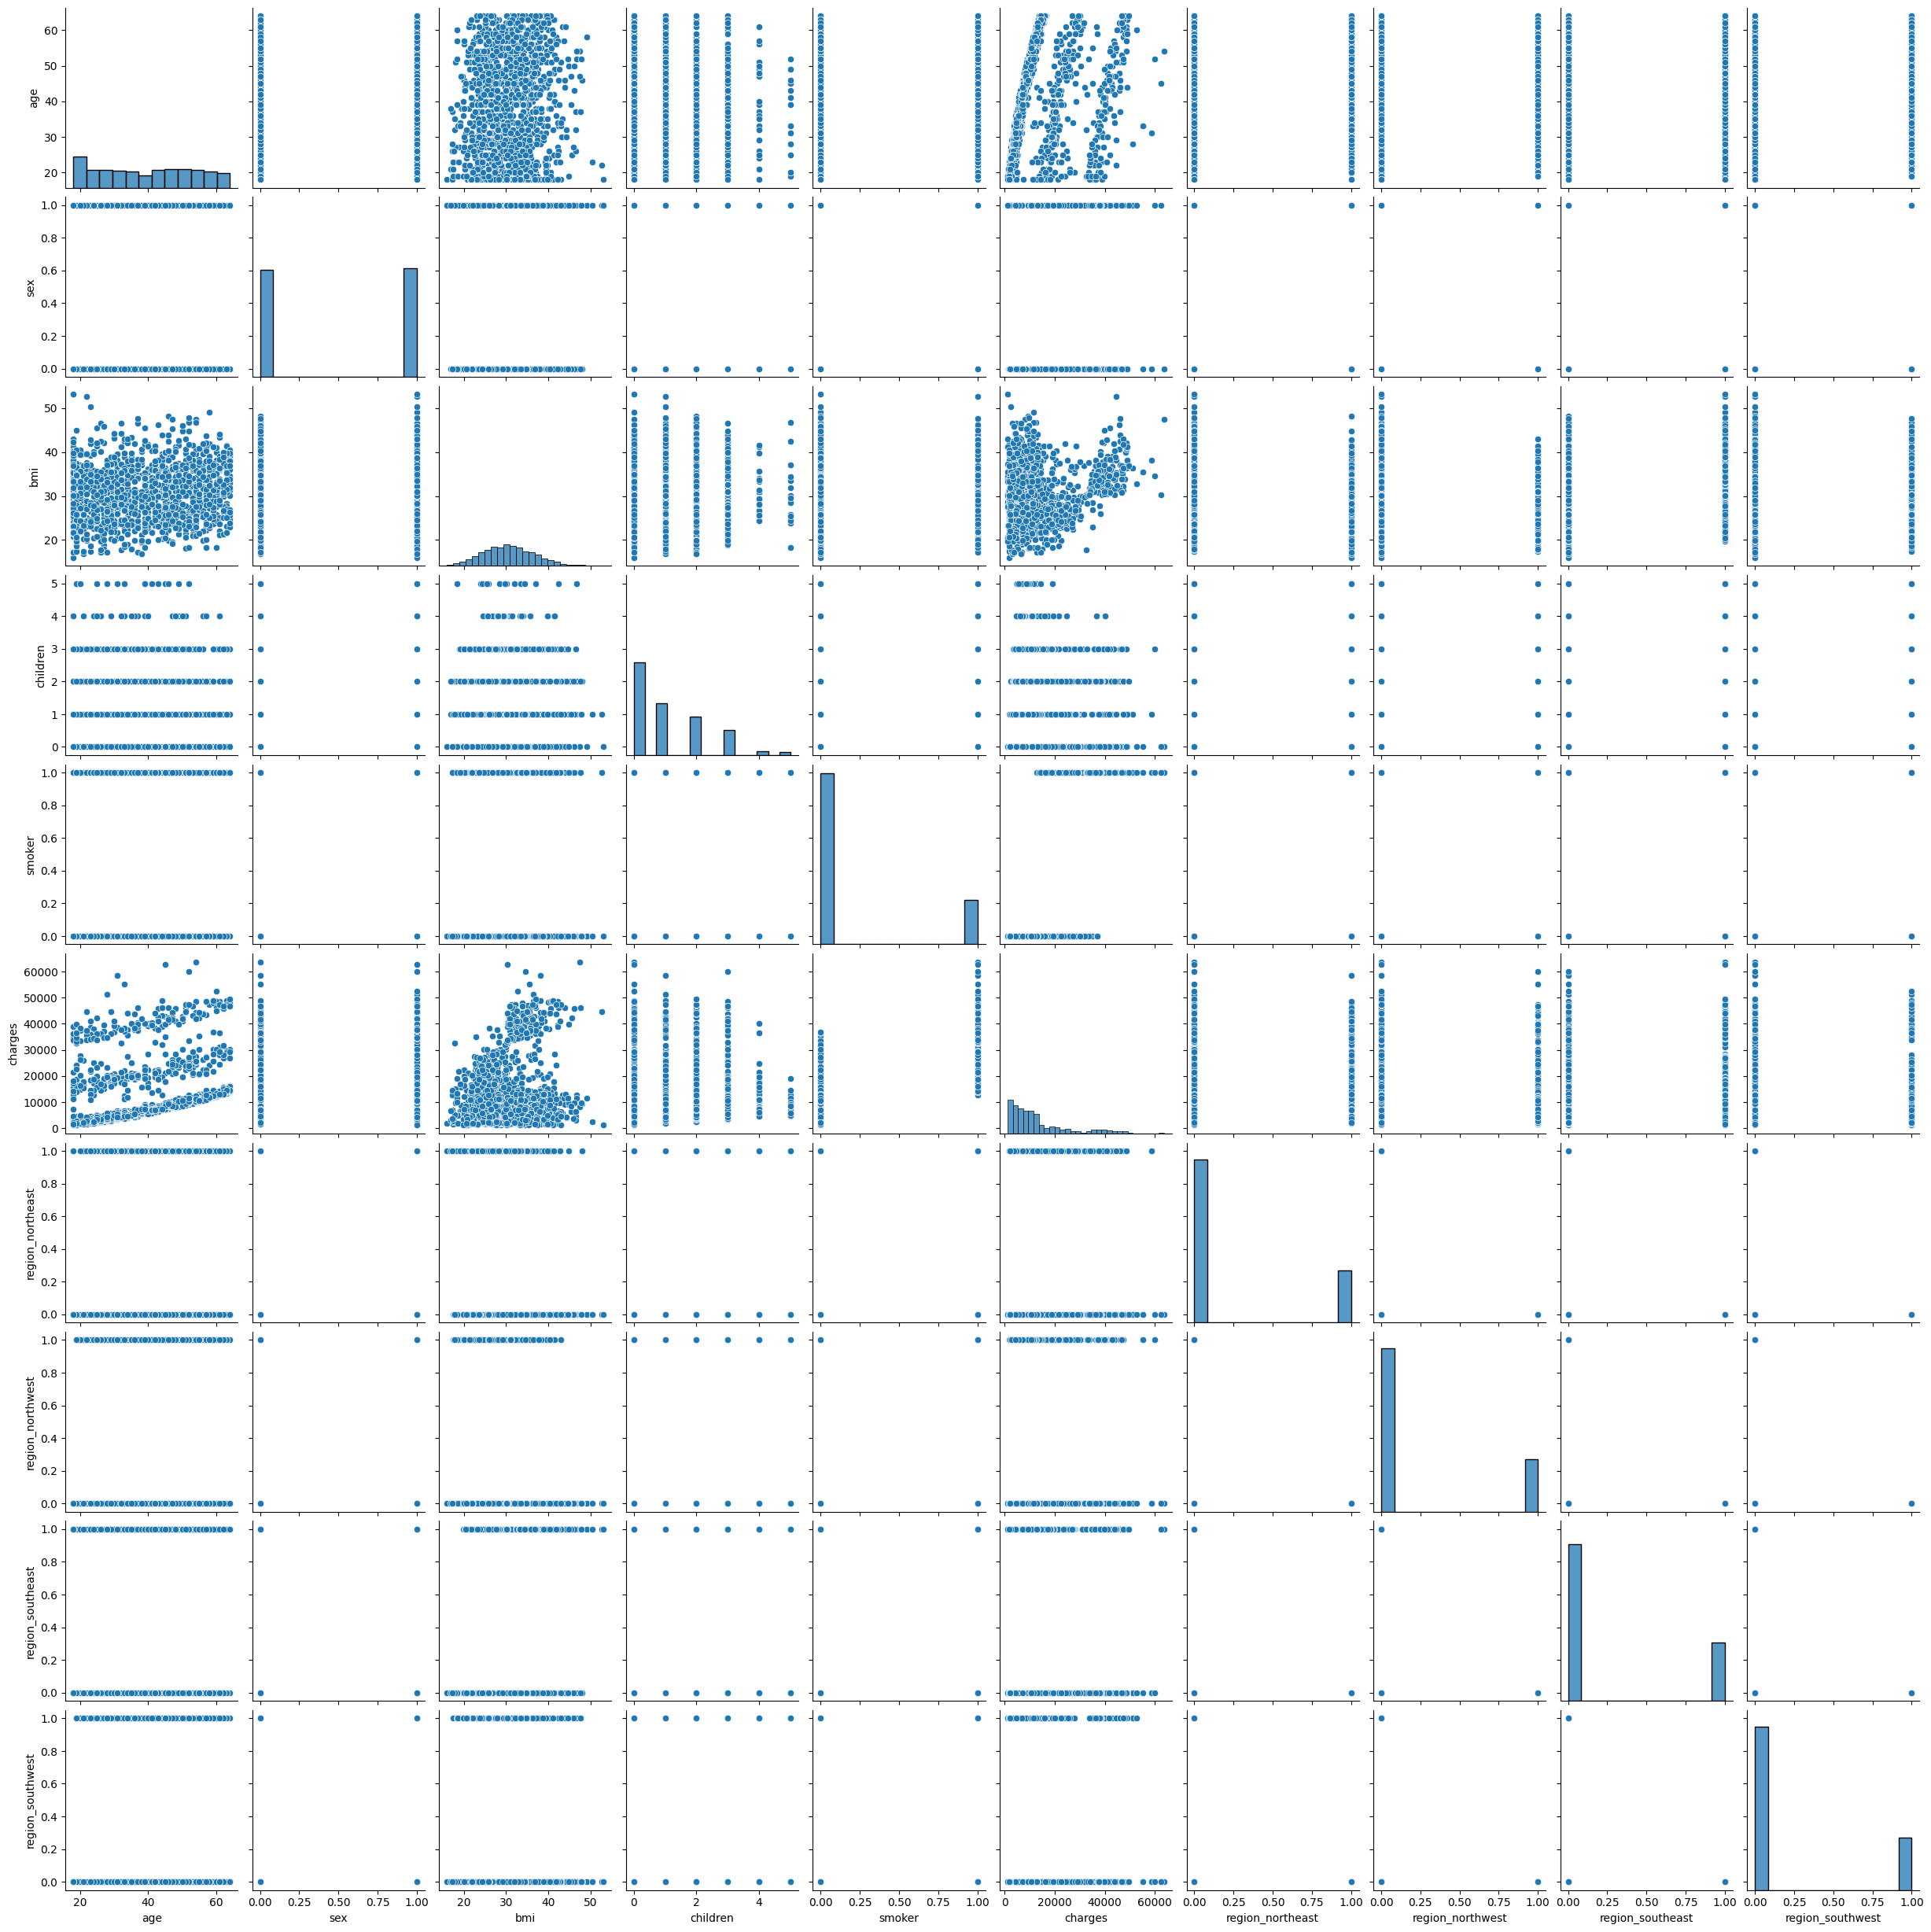

In [27]:
sns.pairplot(dataf)

<Axes: xlabel='age'>

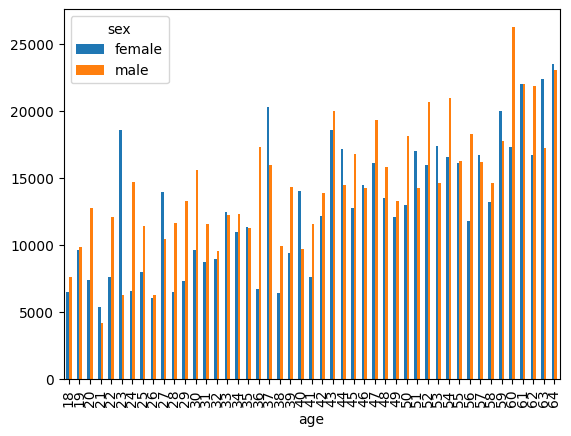

In [28]:
pd.pivot_table(data, values= 'charges', columns = 'sex', index = 'age').plot(kind= 'bar')
#sns.scatterplot(datap, )

Text(0, 0.5, 'charges')

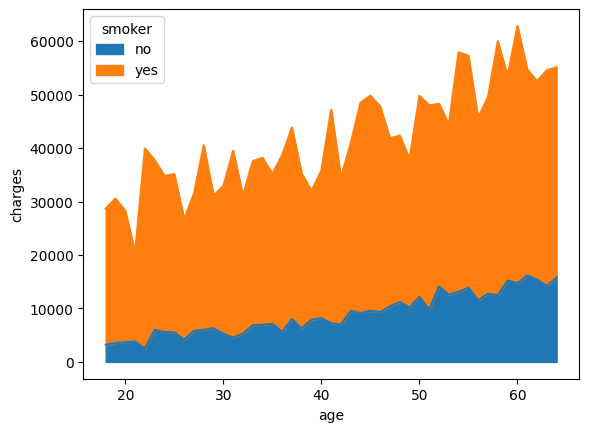

In [29]:
figure = pd.pivot_table(data, values= 'charges', columns = 'smoker', index = 'age').plot(kind= 'area')
figure.set_ylabel('charges')

In [30]:
data['high_bmi'] = data['bmi']>30
data.replace([False,True], ['low','high'], inplace= True)
data

,age,sex,bmi,children,smoker,region,charges,high_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,low
1,18,male,33.770,1,no,southeast,1725.55230,high
2,28,male,33.000,3,no,southeast,4449.46200,high
3,33,male,22.705,0,no,northwest,21984.47061,low
4,32,male,28.880,0,no,northwest,3866.85520,low
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,high
1334,18,female,31.920,0,no,northeast,2205.98080,high
1335,18,female,36.850,0,no,southeast,1629.83350,high
1336,21,female,25.800,0,no,southwest,2007.94500,low


In [31]:
data['new_feature'] = data['smoker'] + '_' + data['high_bmi']
data

,age,sex,bmi,children,smoker,region,charges,high_bmi,new_feature
0,19,female,27.900,0,yes,southwest,16884.92400,low,yes_low
1,18,male,33.770,1,no,southeast,1725.55230,high,no_high
2,28,male,33.000,3,no,southeast,4449.46200,high,no_high
3,33,male,22.705,0,no,northwest,21984.47061,low,no_low
4,32,male,28.880,0,no,northwest,3866.85520,low,no_low
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,high,no_high
1334,18,female,31.920,0,no,northeast,2205.98080,high,no_high
1335,18,female,36.850,0,no,southeast,1629.83350,high,no_high
1336,21,female,25.800,0,no,southwest,2007.94500,low,no_low


Text(0, 0.5, 'mean charges | smoker_bmi')

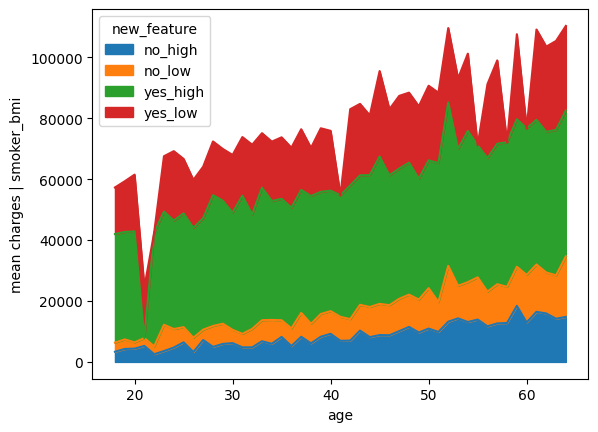

In [32]:
figure2 = pd.pivot_table(data, values= 'charges', columns = 'new_feature', index = 'age').plot(kind= 'area')
figure2.set_ylabel('mean charges | smoker_bmi')

This plot shows the mean charges for smoker with BMI >30 (yes_high), and BMI <30 (yes_low), and for non-smokers with BMI >30 (no_high) and BMI <30 (no_low).<br>
The trend shows that smoker pay more charges compared to non-smokers and persons with BMI >30 are charged more compared to persons with lower BMI.<br>
